In [ ]:
%pip install pandas
%pip install heartpy
%pip install tsfel
%pip install librosa
%pip install statsmodels
%pip install lightgbm
%pip install catboost
%pip install xgboost


In [13]:
import pandas as pd
import numpy as np
import heartpy as hp
from   matplotlib import pyplot as plt
import tsfel
import scipy 
import sklearn as sk
from   sklearn.ensemble import RandomForestRegressor
#import librosa
import csv
import pandas as pd


# __Data collection & preprocessing__

In [14]:
## PPG Data
# define parent directory of PPG files
# PPG_dataDirectory = 'gdrive/My Drive/Colab Notebooks/SCI#02/DataBase/data/'
PPG_dataDirectory = './DataBase/Selected_PPG_wrist/'
# PPG CSV filenames
PPG_data =  [   
            '210823_4.csv',   
            '210830_0.csv',   
            '210927_0.csv',             
            '210927_1.csv',             
            '210927_2.csv',            
            '210928_0.csv',                       
            '210928_1.csv',          
            '210929_0.csv',           
            '210930_0.csv',            
            '210930_1.csv',            
            '210930_2.csv',           
            '210930_3.csv',            
            '210930_4.csv',           
            '210930_5.csv',         
            '211001_0.csv',         
            '211001_1.csv', 
            '211001_2.csv',
            '211018_1.csv',
            '211018_2.csv',
            '211018_3.csv',
            '211018_4.csv',
            '211019_0.csv',
            '211026_0.csv',
            '211026_1.csv',
            '211026_2.csv',
            '211026_3.csv',
            '211115_0.csv',
            '211115_1.csv',         
            ]
# Assigning complete filename of PPG CSV data
PPG_csvData = []
for fileName in PPG_data:
    PPG_csvData.append(PPG_dataDirectory+fileName)


## HbA1c data
HbA1c_data  =   [ 
                8.4,5.4,7.6,5.5,5.4,6.0,5.3,6.3,5.7,4.9,5.6,5.5,5.2,5.2,5.5,5.8,5.7,5.6,5.5,5.7,5.6,7.4,6.2,7.0,6.3,5.3,8.2,6.7
                ]


## SpO2 data
SpO2_data   =   [ 96,97,97,98,97,96,97,97,96,96,97,95,95,98,97,95,97,97,97,97,97,96,97,96,97,98,97,97                
                ]


## Age data
Age_data    =   [ 
                34,25,63,26,25,63,30,27,25,34,
                35
                ]


## Gender data
Gender_data =   [ 
                'M','F','M','M','F','M','F','M','M','M',
                'M','M','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M'
                ]


                
## BMI data
BMI_data    =   [ 
                28.71,23.6,28.71,24,23.6,23.3,27.9,25.8,25.82,19.71,22.72,33.96,20.64,22.04,25.26,20.6,20.4,33.3,26.4,22.2,30.1,28.71,19.6,25.8,29.1,32.8,30.4,21.7
                ]


print('*****************PPG_csvData******************')
print(PPG_csvData)
print('Data counted = '+ str(len(PPG_csvData)))
print('******************HbA1c_data******************')
print(HbA1c_data)
print('Data counted = '+ str(len(HbA1c_data)))
print('******************SpO2_data*******************')
print(SpO2_data)
print('Data counted = '+ str(len(SpO2_data)))
print('*******************Age_data*******************')
print(Age_data)
print('Data counted = '+ str(len(Age_data)))
print('*****************Gender_data******************')
print(Gender_data)
print('Data counted = '+ str(len(Gender_data)))


print('******************BMI_data********************')
print(BMI_data)
print('Data counted = '+ str(len(BMI_data)))

*****************PPG_csvData******************
['./DataBase/Selected_PPG_wrist/210823_4.csv', './DataBase/Selected_PPG_wrist/210830_0.csv', './DataBase/Selected_PPG_wrist/210927_0.csv', './DataBase/Selected_PPG_wrist/210927_1.csv', './DataBase/Selected_PPG_wrist/210927_2.csv', './DataBase/Selected_PPG_wrist/210928_0.csv', './DataBase/Selected_PPG_wrist/210928_1.csv', './DataBase/Selected_PPG_wrist/210929_0.csv', './DataBase/Selected_PPG_wrist/210930_0.csv', './DataBase/Selected_PPG_wrist/210930_1.csv', './DataBase/Selected_PPG_wrist/210930_2.csv', './DataBase/Selected_PPG_wrist/210930_3.csv', './DataBase/Selected_PPG_wrist/210930_4.csv', './DataBase/Selected_PPG_wrist/210930_5.csv', './DataBase/Selected_PPG_wrist/211001_0.csv', './DataBase/Selected_PPG_wrist/211001_1.csv', './DataBase/Selected_PPG_wrist/211001_2.csv', './DataBase/Selected_PPG_wrist/211018_1.csv', './DataBase/Selected_PPG_wrist/211018_2.csv', './DataBase/Selected_PPG_wrist/211018_3.csv', './DataBase/Selected_PPG_wrist/2

In [15]:
PPG_csvArray  = np.asarray(PPG_csvData)
HbA1c_Array   = np.asarray(HbA1c_data)
SpO2_Array    = np.asarray(SpO2_data)
Age_Array     = np.asarray(Age_data)
Gender_Array  = np.asarray(Gender_data)
BMI_Array     = np.asarray(BMI_data)
PPG_csvArray

array(['./DataBase/Selected_PPG_wrist/210823_4.csv',
       './DataBase/Selected_PPG_wrist/210830_0.csv',
       './DataBase/Selected_PPG_wrist/210927_0.csv',
       './DataBase/Selected_PPG_wrist/210927_1.csv',
       './DataBase/Selected_PPG_wrist/210927_2.csv',
       './DataBase/Selected_PPG_wrist/210928_0.csv',
       './DataBase/Selected_PPG_wrist/210928_1.csv',
       './DataBase/Selected_PPG_wrist/210929_0.csv',
       './DataBase/Selected_PPG_wrist/210930_0.csv',
       './DataBase/Selected_PPG_wrist/210930_1.csv',
       './DataBase/Selected_PPG_wrist/210930_2.csv',
       './DataBase/Selected_PPG_wrist/210930_3.csv',
       './DataBase/Selected_PPG_wrist/210930_4.csv',
       './DataBase/Selected_PPG_wrist/210930_5.csv',
       './DataBase/Selected_PPG_wrist/211001_0.csv',
       './DataBase/Selected_PPG_wrist/211001_1.csv',
       './DataBase/Selected_PPG_wrist/211001_2.csv',
       './DataBase/Selected_PPG_wrist/211018_1.csv',
       './DataBase/Selected_PPG_wrist/211018_2

> __Algorithm 01:__ Baseline Dirft Removal by ()
>> ACK: __Developed by Shama__. _This algorithm ()_
>> 1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
>> 2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

In [16]:
### Initialize Second Order Section
sos  = scipy.signal.butter(N=2, Wn=8.0, btype='low',  fs=32, output='sos')  ### The sampling frequency of the digital system(‘fs’).second-order sections (‘sos’)
sos1 = scipy.signal.butter(N=2, Wn=0.5, btype='high', fs=32, output='sos')  ###
def removing_baseline_drift (ppgSignal, showFigure='False'): 
   # Getting corresponding Combined PPG Data 
   dat   = pd.read_csv(ppgSignal, delimiter=',', header=None)
   if (dat.shape[1] == 3):
      bs = dat.iloc[:,2]
      gs = dat.iloc[:,1]
      rs = dat.iloc[:,0]
   else:
      bs = dat.iloc[:,3]
      gs = dat.iloc[:,2]
      rs = dat.iloc[:,1]
   fil_s_b = scipy.signal.sosfilt(sos, bs)[10:]
   fil_s_g = scipy.signal.sosfilt(sos, gs)[10:]
   fil_s_r = scipy.signal.sosfilt(sos, rs)[10:]

   fil_s_b1 = scipy.signal.sosfilt(sos1, fil_s_b)[110:] + np.mean(fil_s_b)
   fil_s_g1 = scipy.signal.sosfilt(sos1, fil_s_g)[110:] + np.mean(fil_s_g)
   fil_s_r1 = scipy.signal.sosfilt(sos1, fil_s_r)[110:] + np.mean(fil_s_r)
   
   
   ### Visualization
   if showFigure=='True':
      print('***************Blue**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(25, 7))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_b), color='blue', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_b1), color='blue', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()

      print('***************Green**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(25, 7))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_g), color='green', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_g1), color='green', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()
      
      print('***************Red**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(25, 7))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_r), color='red', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_r1), color='red', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()

   ## Return outcome
   return(fil_s_r1, fil_s_g1, fil_s_b1)

***************Blue**************


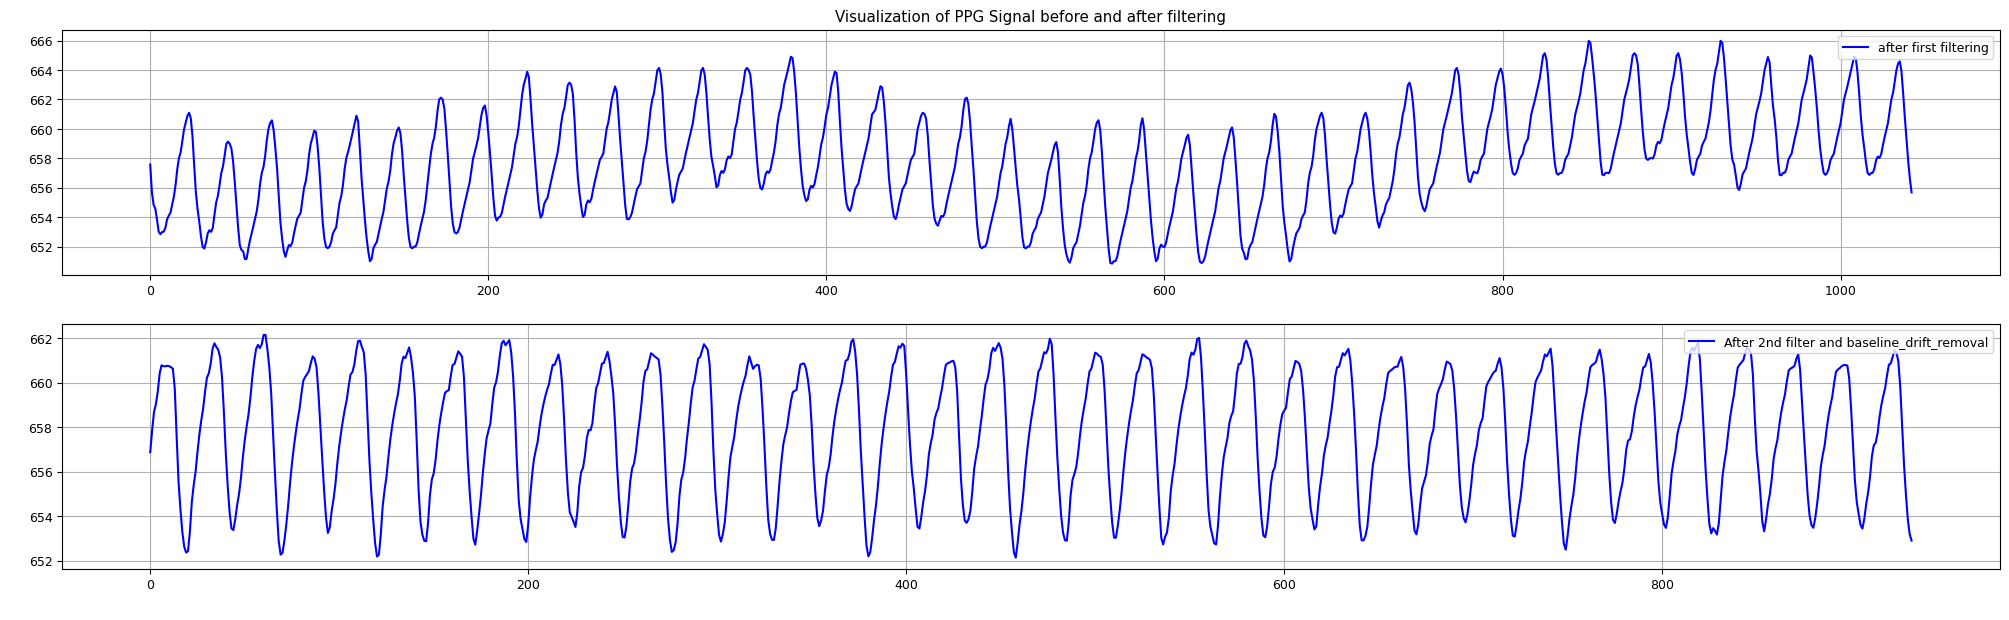

***************Green**************


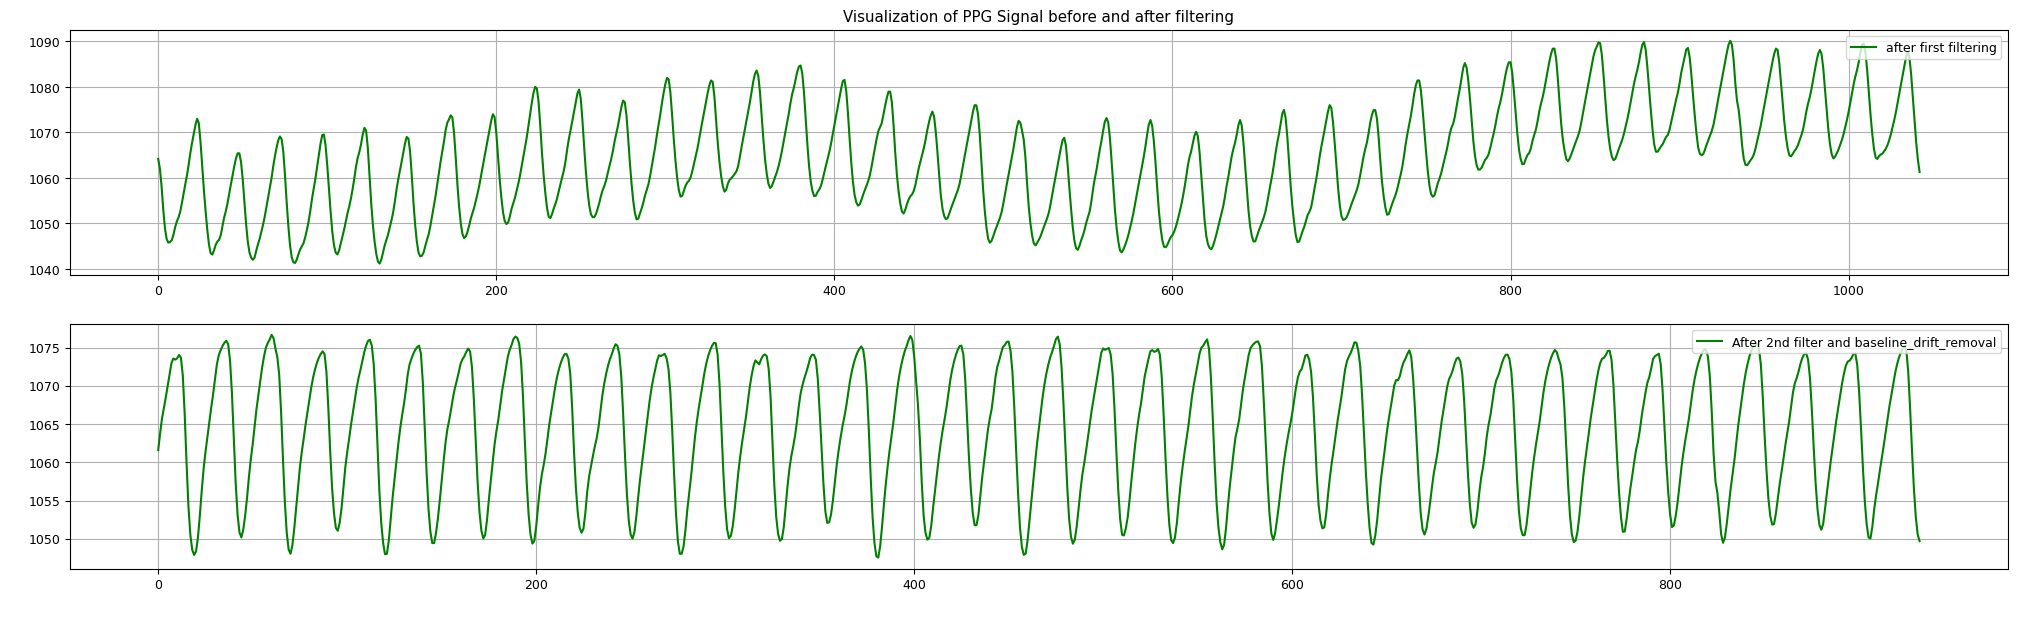

***************Red**************


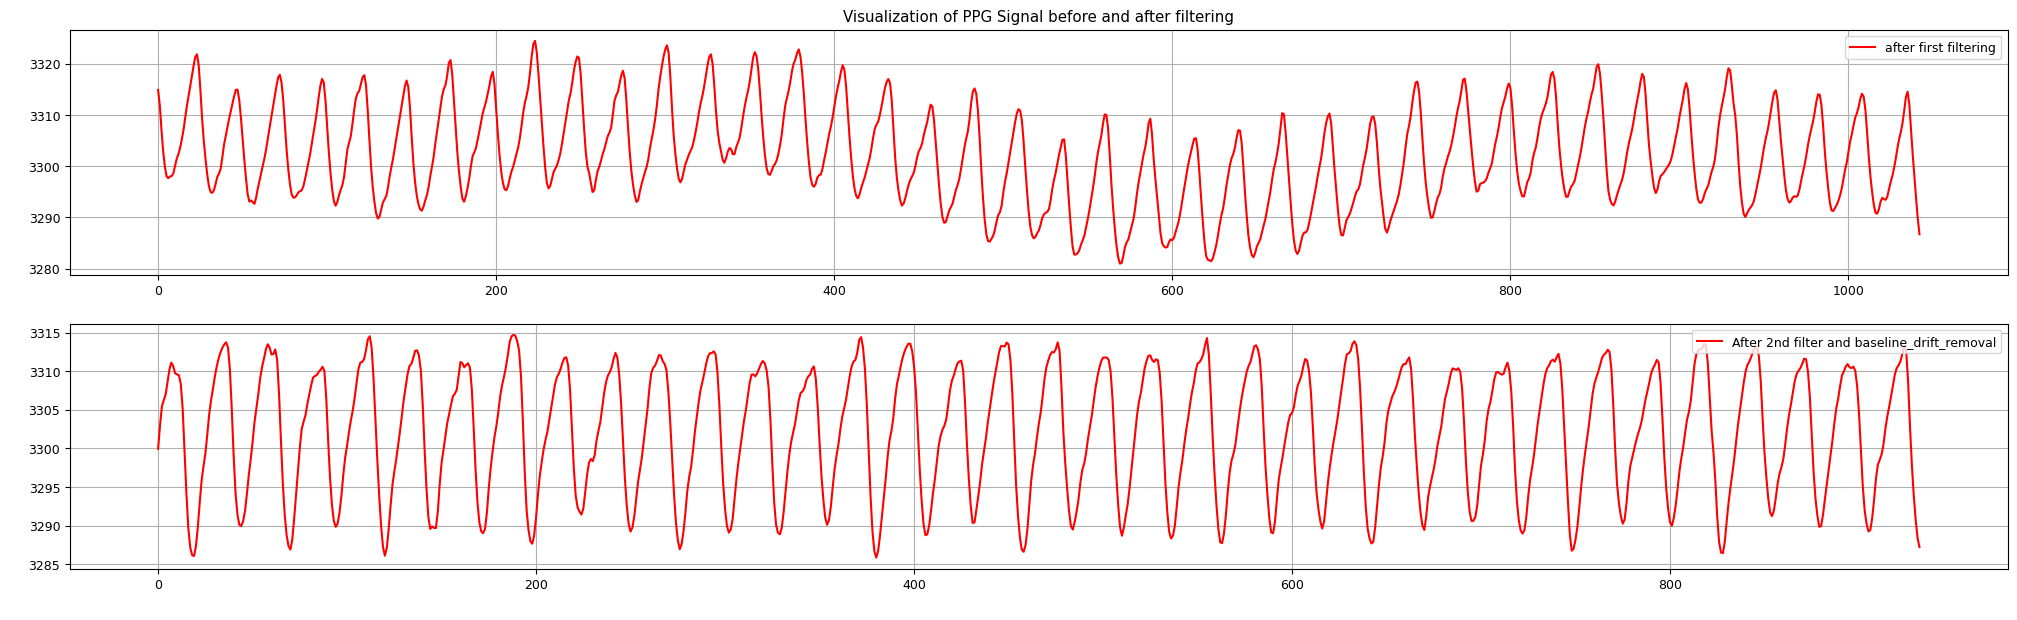

In [17]:
r,g,b = removing_baseline_drift(ppgSignal=PPG_csvArray [0], showFigure='True')